here is the meaning of the abbreviations in the columns:
cap.shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
cap.color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
stalk.color.above.ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
stalk.color.below.ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
bruises: bruises=t,no=f
population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y

Hi everyone, this competition is about having the least number of deaths. So even if the accuracy of your model is good, if you have a lot of deaths, you will rank lower on the leaderboard. 'Op.cost' is for opportunity cost meaning, these are mushrooms that are safe and can be eaten, but your model predicted them wrong. In other words, a false positive.

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [120]:
data = pd.read_csv("/content/drive/MyDrive/coding/mushroom/train_1.csv")

In [121]:
data

,cap.shape,cap.color,bruises,stalk.color.above.ring,stalk.color.below.ring,population,Id,poisonous
0,k,e,False,w,w,v,6573,1
1,f,e,True,p,w,y,4426,0
2,b,w,False,w,w,s,7018,0
3,k,g,False,w,w,n,5789,0
4,f,n,True,p,g,v,6187,0
...,...,...,...,...,...,...,...,...
6494,f,g,False,b,b,v,7002,1
6495,k,e,False,p,p,v,7323,1
6496,f,g,False,n,b,y,6206,1
6497,f,n,True,w,w,s,4658,0


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   cap.shape               6499 non-null   object
 1   cap.color               6499 non-null   object
 2   bruises                 6499 non-null   bool  
 3   stalk.color.above.ring  6499 non-null   object
 4   stalk.color.below.ring  6499 non-null   object
 5   population              6499 non-null   object
 6   Id                      6499 non-null   int64 
 7   poisonous               6499 non-null   int64 
dtypes: bool(1), int64(2), object(5)
memory usage: 361.9+ KB


In [123]:

display(data.describe(include=['O']))

,cap.shape,cap.color,stalk.color.above.ring,stalk.color.below.ring,population
count,6499,6499,6499,6499,6499
unique,6,10,9,9,6
top,x,n,w,w,v
freq,2935,1823,3537,3481,3219


In [124]:
#data = data.drop(['Id' ], axis=1)

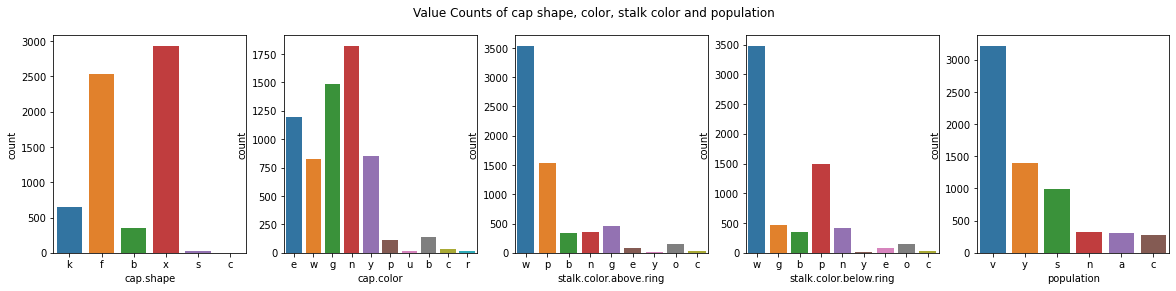

In [125]:
#histogram to see distribution of data point to see different categories
fig, ax2 = plt.subplots(1,5,  figsize=(20,4))
fig.suptitle('Value Counts of cap shape, color, stalk color and population')
sns.countplot(ax=ax2[0], x= 'cap.shape', data = data)
sns.countplot(ax=ax2[1], x='cap.color', data=data)
sns.countplot(ax=ax2[2], x='stalk.color.above.ring',data=data)
sns.countplot(ax=ax2[3], x='stalk.color.below.ring',data=data)
sns.countplot(ax=ax2[4], x='population',data=data)

plt.show()


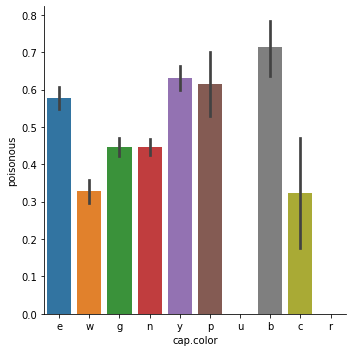

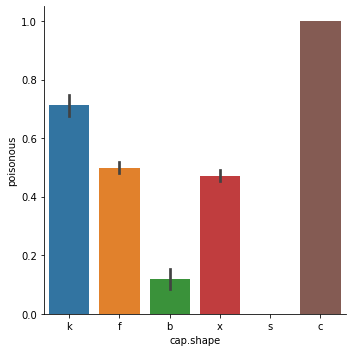

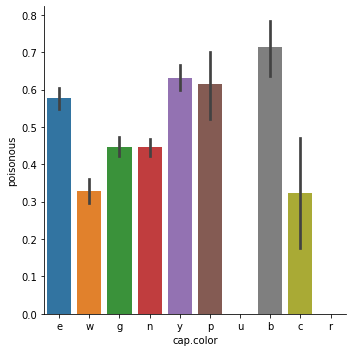

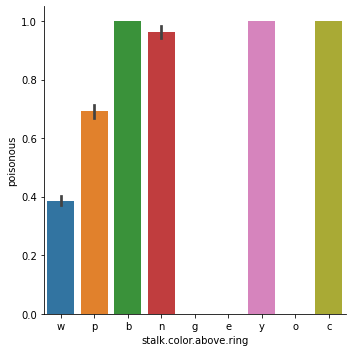

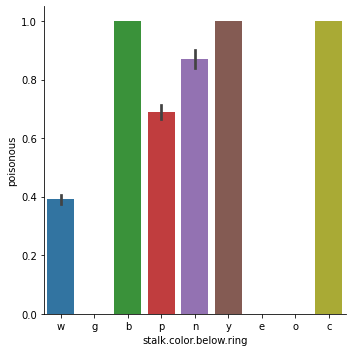

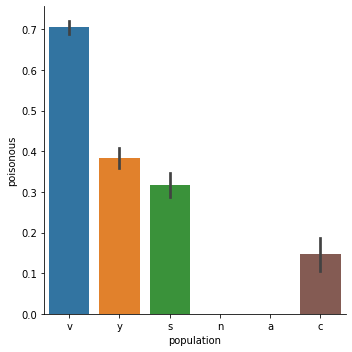

In [126]:

sns.catplot(x="cap.color", y="poisonous", kind="bar", data=data)
sns.catplot(x='cap.shape', y="poisonous", kind="bar", data=data)
sns.catplot(x='cap.color', y="poisonous", kind="bar", data=data)
sns.catplot(x='stalk.color.above.ring', y="poisonous", kind="bar", data=data)
sns.catplot(x='stalk.color.below.ring', y="poisonous", kind="bar", data=data)
sns.catplot(x='population', y="poisonous", kind="bar", data=data)

plt.show()

In [127]:
#pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.
ohe = pd.get_dummies(data, drop_first=True)
ohe.head()

,bruises,Id,poisonous,cap.shape_c,cap.shape_f,cap.shape_k,cap.shape_s,cap.shape_x,cap.color_c,cap.color_e,...,stalk.color.below.ring_n,stalk.color.below.ring_o,stalk.color.below.ring_p,stalk.color.below.ring_w,stalk.color.below.ring_y,population_c,population_n,population_s,population_v,population_y
0,False,6573,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,True,4426,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,False,7018,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,False,5789,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,True,6187,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [128]:
X= ohe.set_index('Id')


In [129]:
X = X.drop(["poisonous"], axis=1)
X

,bruises,cap.shape_c,cap.shape_f,cap.shape_k,cap.shape_s,cap.shape_x,cap.color_c,cap.color_e,cap.color_g,cap.color_n,...,stalk.color.below.ring_n,stalk.color.below.ring_o,stalk.color.below.ring_p,stalk.color.below.ring_w,stalk.color.below.ring_y,population_c,population_n,population_s,population_v,population_y
Id,,,,,,,,,,,,,,,,,,,,,
6573,False,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4426,True,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
7018,False,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5789,False,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
6187,True,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7002,False,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7323,False,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
6206,False,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [130]:
y=data.pop("poisonous")

# Test-Train Split

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [132]:
y_train

198     1
4637    0
3019    1
2468    0
6225    0
       ..
5218    0
4060    1
1346    1
3454    1
3582    1
Name: poisonous, Length: 5199, dtype: int64

In [133]:
X_train

,bruises,cap.shape_c,cap.shape_f,cap.shape_k,cap.shape_s,cap.shape_x,cap.color_c,cap.color_e,cap.color_g,cap.color_n,...,stalk.color.below.ring_n,stalk.color.below.ring_o,stalk.color.below.ring_p,stalk.color.below.ring_w,stalk.color.below.ring_y,population_c,population_n,population_s,population_v,population_y
Id,,,,,,,,,,,,,,,,,,,,,
1832,True,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5006,True,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4040,True,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
5533,False,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2710,True,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209,True,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
109,False,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
6091,False,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0


# Making pipeline for classifiers

In [134]:
# Decision tree classifier
dt= make_pipeline(SimpleImputer(strategy="most_frequent"),  
                              DecisionTreeClassifier())
dt.fit(X_train, y_train)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt.score(X_test, y_test)

0.9615384615384616

In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       671
           1       0.94      0.98      0.96       629

    accuracy                           0.96      1300
   macro avg       0.96      0.96      0.96      1300
weighted avg       0.96      0.96      0.96      1300



In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [137]:
# logistic regression
lr = make_pipeline(OneHotEncoder(handle_unknown = 'ignore'), LogisticRegression(solver='liblinear',multi_class='ovr'))
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8823076923076923

In [138]:
# svm
svm = make_pipeline(OneHotEncoder( handle_unknown = 'ignore'), SVC(gamma='auto'))
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9223076923076923

In [139]:
# random forest
rf = make_pipeline(OneHotEncoder( handle_unknown = 'ignore'), RandomForestClassifier(n_estimators=40))
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9653846153846154

# Cross Validation

In [140]:
from sklearn.model_selection import cross_val_score

In [141]:
from sklearn.model_selection import KFold
#define cross-validation method to use
cv = KFold(n_splits=10, random_state=5, shuffle=True)

In [142]:
score_dt=cross_val_score(dt, X, y,cv=cv, scoring ="accuracy")
print(score_dt)
print("Avg :",np.average(score_dt))





[0.96307692 0.97538462 0.96615385 0.95538462 0.95076923 0.95846154
 0.96307692 0.96307692 0.94615385 0.95377504]
Avg : 0.9595313500059263


# Running model on test data

In [143]:
test = pd.read_csv("/content/drive/MyDrive/coding/mushroom/test.csv")

In [144]:
test

,Id,cap.shape,cap.color,stalk.color.above.ring,stalk.color.below.ring,bruises,population
0,5165,f,w,w,w,True,v
1,4281,f,g,n,p,False,v
2,231,x,n,w,p,True,v
3,3890,f,n,w,w,False,s
4,1521,x,y,n,p,False,v
...,...,...,...,...,...,...,...
1620,983,x,n,w,y,False,v
1621,7055,x,e,p,g,True,v
1622,7456,x,y,b,n,False,y
1623,5132,x,w,w,w,True,n


In [145]:
test.set_index("Id", inplace=True)  #reset index as Id

In [146]:
test1 = pd.get_dummies(test, drop_first=True)
test1.head()

,bruises,cap.shape_c,cap.shape_f,cap.shape_k,cap.shape_s,cap.shape_x,cap.color_c,cap.color_e,cap.color_g,cap.color_n,...,stalk.color.below.ring_n,stalk.color.below.ring_o,stalk.color.below.ring_p,stalk.color.below.ring_w,stalk.color.below.ring_y,population_c,population_n,population_s,population_v,population_y
Id,,,,,,,,,,,,,,,,,,,,,
5165,True,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4281,False,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
231,True,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3890,False,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1521,False,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [147]:
test_preds = dt.predict(test1)

# Score Submission

In [148]:
#test1.reset_index()

In [149]:
test1["poisonous"] = test_preds

In [151]:
test1

,bruises,cap.shape_c,cap.shape_f,cap.shape_k,cap.shape_s,cap.shape_x,cap.color_c,cap.color_e,cap.color_g,cap.color_n,...,stalk.color.below.ring_o,stalk.color.below.ring_p,stalk.color.below.ring_w,stalk.color.below.ring_y,population_c,population_n,population_s,population_v,population_y,poisonous
Id,,,,,,,,,,,,,,,,,,,,,
5165,True,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
4281,False,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
231,True,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
3890,False,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
1521,False,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,False,0,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
7055,True,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7456,False,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [152]:
Submission = test1[["Id","poisonous"]]

KeyError: ignored

In [ ]:
Submission

In [ ]:
sns.countplot(x='poisonous', data = test)

In [ ]:
Submission.to_csv("results.csv", index = False)

In [ ]:
from google.colab import files
files.download('results.csv')